### Import dos Pacotes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from tqdm import tqdm
import numpy as np

### Import dos Dados

In [4]:
# lê arquivo csv e cria dataframe
df = pd.read_csv('ClusterizacaoEx7.csv', sep=';')

In [5]:
# formato dos dados
df.shape

(5000, 2)

In [6]:
# primeiras linhas
df.head()

,V1,V2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [7]:
# tipo dos dados
df.dtypes

V1    int64
V2    int64
dtype: object

In [8]:
# verificando se há dados faltantes
df.isna().sum()

V1    0
V2    0
dtype: int64

### Plotando os dados

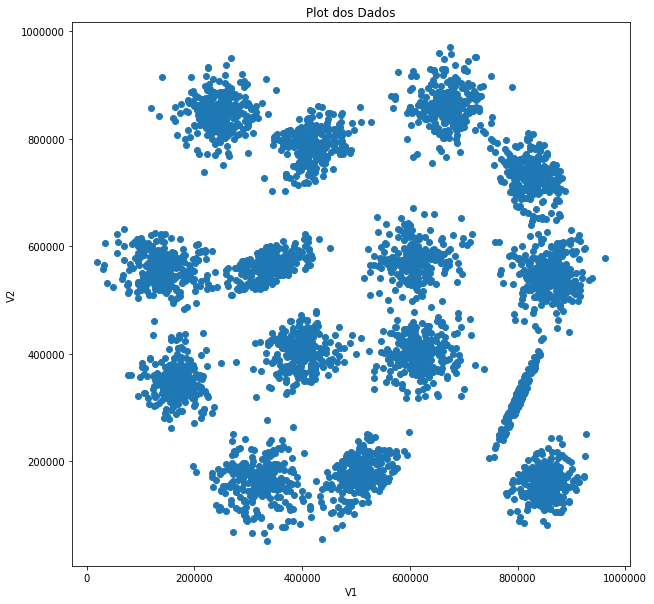

In [26]:
figure(num=None, figsize=(10, 10))
plt.scatter(df['V1'], df['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Plot dos Dados');

Podemos observar dois pontos importantes pela observação dos dados:
- Pela inspeção visual, aparentemente temos **15 clusters** nos dados.
- Os dados não estão normalizados. Entretanto, ambos os eixos encontram-se entre 0 e 1.000.000. Também não há grande concentração em uma região específica ou outliers. Desta forma, **não é necessário** normalizar ou padronizar os dados.

Outro ponto importante do exercício é que há muito ruídos nos dados. Isto sugere que o melhor método a utilizar é o DBScan, que consegue isolar os ruídos em uma classe específica. Entretanto, vamos analisar a clusterização com 2 métodos

### Clusterização com o KMeans

Já sabemos que a quantidade ideal de clusters é 15. Portanto, vamos utilizar o KMeans com **k=15**:

In [20]:
# clusterizando:
kmeans = KMeans(n_clusters=15).fit(df)

In [24]:
scores = silhouette_score(df.values, kmeans.labels_, metric='euclidean')
scores

0.711278614093076

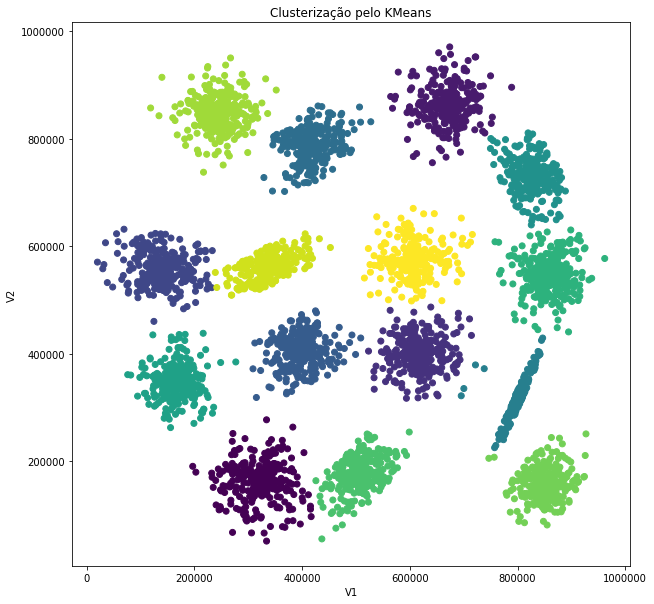

In [27]:
# Visualizando a Clusterização com o KMeans

figure(num=None, figsize=(10, 10))
plt.scatter(df['V1'], df['V2'], c=kmeans.labels_)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Clusterização pelo KMeans');

Temos que o resultado não foi ruim, com um silhouette score de 0.71. Visualmente, observamos que os clusters foram também corretamente identificados. Porém, vemos que alguns pontos de ruído ficam aparentemente mal classificados ou são dúbios.

### Clusterização com o DBScan

Vamos entender visualmente o valor do epsilon primeiramente, para termos uma noção do intervalo de busca:

In [29]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

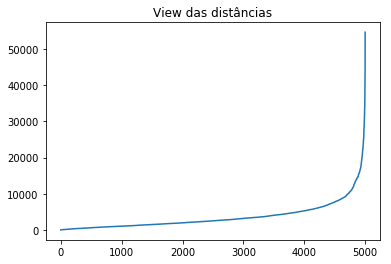

In [30]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.title('View das distâncias')
plt.show()

Vamos utilizar o epsilon de 4800

In [63]:
# aux var para entender a qtd mínima de amostras
scores = []

# for para testar qtd ideal mínima de amostras
for i in tqdm(range(2,15)):
    db = DBSCAN(eps=20000, min_samples=i).fit(df)
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df, db.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  1.91it/s]


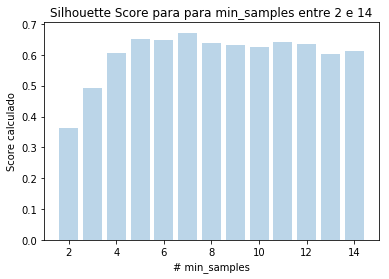

In [64]:
# Visualizando o Silhouette Score pela quantidade de amostras

plt.figure()
plt.bar(range(2,15), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para para min_samples entre 2 e 14')
plt.xlabel('# min_samples')
plt.ylabel('Score calculado')
plt.show()

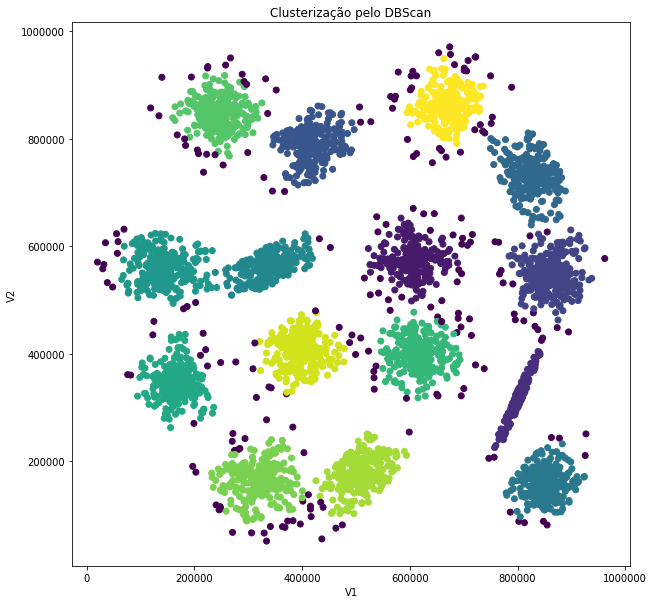

In [66]:
figure(num=None, figsize=(10, 10))
db = DBSCAN(eps=20000, min_samples=7).fit(df)
plt.scatter(df['V1'], df['V2'], c=db.labels_)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Clusterização pelo DBScan');

In [67]:
# Adicionando os labels ao dataframe dos dados
df['labels'] = db.labels_

Vimos que o silhouette Score obtido com o KMeans foi 0.71. Com o DBScan, porém chegamos a pouco menos de 0.7, utilizando epsilon = 20.000 e min_samples = 7. Porém, este cálculo considera o ruído como uma classe, e já observamos que a quantidade de ruído é relevante. Faz sentido analisarmos o resultado fazendo a exclusão destes dados para o cálculo:

In [69]:
silhouette_score(df[df['labels']>0][['V1','V2']], df[df['labels']>0]['labels'])

0.7402591485699139

### Conclusão

Visualmente, temos claro que o DBScan identifica melhor os dados de ruído. O cálculo do silhouette score, excluindo os ruídos, também se mostrou melhor com o DBScan, alcançando 0.74. Portanto, a **melhor clusterização** para os dados foi obtida com o **DBScan, com min_samples = 7 e epsilon = 20k**. Com tanto, o silhouette score obtido foi 0.74.